<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 5

Autor: Nicolás Burgos


### ENUNCIADO

A partir de la siguiente plantilla, sabiendo que en banda de paso la respuesta es *Chebyshev*:

![alt text](plantilla_ts_05.png)

**$\rightarrow f_0 = 22kHz$ ; $f_{s1} = 17kHz$ ; $f_{s2} = 36kHz$**

**$\rightarrow Q_{BP} = 5$** siendo **$\omega_1 \cdot \omega_2 = \omega_0^2$** y **$\omega_2 − \omega_1 = \frac{\omega_0}{Q}$** 

1. Obtener la plantilla de *atenuación normalizada en frecuencia*.  Indicar los valores de $\alpha_{MIN}$ y $\alpha_{MAX}$

2. Obtener la función transferencia *normalizada* del prototipo pasa bajo que satisfaga el requerimiento del filtro pasa banda.

3. Aplicar el núcleo de transformación *pasa banda* y obtener la transferencia. Factorizar convenientemente para expresar en SOS.

4. Realizar la simulación numérica en python. Graficar la respuesta en frecuencia del filtro pasa banda total, y las de las SOS.

5. Realizar la Simulación Circuital del filtro pasa banda implementado mediante secciones pasivas separadas por seguidores de tensión activos.

6. Dado el *pasa bajo* hallado en (2) aplicar el núcleo de transformación *pasa altos* y obtener la transferencia.

7. Dado el *pasa bajo* hallado en (2) , implementarlo con pasivos y aplicar la transformación de Bruton. Obtener el valor numérico de **D** del **FDNR** siendo $Z_{FDNR} = \frac{1}{s^2 D}$

### RESOLUCIÓN

#### PUNTO #1

Antes de obtener la plantilla de atenuación normalizada en frecuencia, buscaremos los valores de las frecuencias de corte de la banda de paso, es decir, $f_1$ y $f_2$:

\begin{equation}
f_1 \cdot f_2 = f_0^2 \rightarrow f_2 = \frac{f_0^2}{f_1}
\end{equation}

\begin{equation}
f_2 - f_1 = \frac{f_0}{Q_{BP}} \rightarrow f_1^2 + f_1 \cdot \frac{f_0}{Q_{BP}} - f_0^2 = 0 \rightarrow f_1 = 19,91KHz
\end{equation}

\begin{equation}
\rightarrow f_2 = 24,31KHz
\end{equation}

De esta forma, tomando como norma de frecuencia a $f_0$, obtenemos la siguiente plantilla de atenuación:

![alt text](plantilla_att_norm_ts5.jpeg)

Donde podemos determinar:

\begin{equation}
\alpha_{MAX} = 0.5dB ; \alpha_{MIN1} = 16dB ; \alpha_{MIN2} = 24dB
\end{equation}

\begin{equation}
\frac{f_1}{f_0} = 0.905 ; \frac{f_{s1}}{f_0} = 0.773 ; \frac{f_2}{f_0} = 1.105 ; \frac{f_{s2}}{f_0} = 1.636
\end{equation}

#### PUNTO #2:

Para encontrar cual será la función transferencia pasabajos prototipo que satisfaga las condiciones propuestas, es necesario encontrar el factor de ripple "$\epsilon$" y el orden "$n$" requerido. Para ello, tendremos que realizar el siguiente mapeo de la variable "$\omega$"" hacia el dominio de la variable "$\Omega$":

![alt text](mapeo_att_ts5.jpeg)

Donde podemos determinar:

\begin{equation}
\Omega = Q_{BP} \cdot \frac{(\omega^2 - \omega_0^2)}{\omega \cdot \omega_0}
\end{equation}

\begin{equation}
\Omega|_{\omega_0 = 1} = Q_{BP} \cdot \frac{(\omega^2 - 1)}{\omega}
\end{equation}

\begin{equation}
\Omega_{s1} = \Omega|_{\omega = \frac{\omega_{s1}}{\omega_0} = 0.773} = |-2.603| = 2.603
\end{equation}

\begin{equation}
\Omega_{s2} = \Omega|_{\omega = \frac{\omega_{s2}}{\omega_0} = 1.636} = 5.124
\end{equation}

Ahora ya estamos en condiciones de encontrar $\epsilon$ y $n$:

\begin{equation}
\rightarrow \alpha_{MAX} = 10 log(1 + \epsilon^2)
\end{equation}

\begin{equation}
\epsilon^2 = 10^{\frac{\alpha_{MAX}}{10}} - 1 = 0.122 \rightarrow \epsilon = 0.349
\end{equation}

Ahora, para encontrar el orden, debemos utilizar ambos valores de $\Omega_s$ encontrados más arriba para hallar para que valor de "$n$" se cumple la siguiente condición. El orden más alto será el elegido, puesto que cumplirá con ambos requerimientos de atenuación:

\begin{equation}
\rightarrow \alpha_1(n) = 10 log[1 + \epsilon^2 \cdot cosh^2[n \cdot cosh^{-1}(\Omega_{s1})]] \geq \alpha_{MIN1}
\end{equation}

\begin{equation}
\rightarrow \alpha_2(n) = 10 log[1 + \epsilon^2 \cdot cosh^2[n \cdot cosh^{-1}(\Omega_{s2})]] \geq \alpha_{MIN2}
\end{equation}

De esta forma, iteramos:

\begin{equation}
\rightarrow \alpha_1(1) = 2.617dB \leq \alpha_{MIN1}
\end{equation}

\begin{equation}
\alpha_1(2) = 13.058dB \leq \alpha_{MIN1}
\end{equation}

\begin{equation}
\alpha_1(3) = 26.823 \geq \alpha_{MIN1}
\end{equation}

\begin{equation}
\rightarrow \alpha_2(1) = 6.236 \leq \alpha_{MIN2}
\end{equation}

\begin{equation}
\alpha_2(2) = 25.115 \geq \alpha_{MIN2}
\end{equation}

Así, el factor de ripple será $\epsilon = 0.349$ y el orden del filtro pasabajos prototipo es $n = 3$. Luego, planteamos lo siguiente, donde $C_3^2(\omega)$ es el polinomio de Chebyshev de orden 3, que se corresponde con $C_3^2(\omega) = 4\omega^3 - 3\omega$:

\begin{equation}
|T(j\omega)|^2 = \frac{1}{1 + \epsilon^2 \cdot C_3^2(\omega)} = \frac{1}{1 + \epsilon^2 \cdot (4\omega^3 - 3\omega)^2} = \frac{1}{1 + \epsilon^2 \cdot (16\omega^6 - 24\omega^4 + 9\omega^2)}
\end{equation}

\begin{equation}
|T(j\omega)|^2|_{\omega = \frac{s}{j}} = T(s) \cdot T(-s) = \frac{\frac{1}{\epsilon^2}}{(\frac{s}{j})^6 - \frac{3}{2} (\frac{s}{j})^4 + \frac{9}{16} (\frac{s}{j})^2 + \frac{1}{\epsilon^2}} = \frac{\frac{1}{16\epsilon^2}}{-s^6 - \frac{3}{2} s^4 - \frac{9}{16} s^2 + \frac{1}{16\epsilon^2}}
\end{equation}

En este punto podemos definir:

\begin{equation}
\rightarrow T(s) = \frac{c}{s^3 + a s^2 + b s + c}
\end{equation}

\begin{equation}
\rightarrow T(-s) = \frac{c}{-s^3 + a s^2 - b s + c}
\end{equation}

\begin{equation}
\rightarrow T(s) \cdot T(-s) = \frac{c^2}{-s^6 + s^4 (a^2 -2b) + s^2 (2ac - b^2) + c^2}
\end{equation}

Por simple inspección, podemos determinar:

\begin{equation}
\rightarrow c^2 = \frac{1}{16\epsilon^2} \rightarrow c = \frac{1}{4\epsilon} = 0.716
\end{equation}

\begin{equation}
\rightarrow a^2 - 2b = -\frac{3}{2} \rightarrow b = \frac{a^2}{2} + \frac{3}{4}
\end{equation}

\begin{equation}
\rightarrow 2ac - b^2 = 2ac - \left(\frac{a^2}{2} + \frac{3}{4} \right)^2 = -\frac{9}{16} \rightarrow a \cdot (a^3 + 3a - 8c) = 0 \rightarrow a = 1.253
\end{equation}

\begin{equation}
b = \frac{a^2}{2} + \frac{3}{4} = 1.535
\end{equation}

Habiendo obtenido los valores $a = 1.253$, $b = 1.535$ y $c = 0.716$, podemos definir la función transferencia pasabajos prototipo:

\begin{equation}
T(s) = \frac{c}{s^3 + a s^2 + b s + c} = \frac{0.716}{s^3 + 1.253 s^2 + 1.535 s + 0.716} = \frac{0.716}{(s + 0.627) \cdot (s + 0.313 - j1.022) \cdot (s + 0.313 + j1.022)}
\end{equation}

\begin{equation}
T(s)_{LP} = \frac{0.627}{s + 0.627} \cdot \frac{1.143}{s^2 + 0.626 s + 1.143} = \frac{0.627}{s + 0.627} \cdot \frac{1.069^2}{s^2 + \frac{1.069}{1.708} \cdot s + 1.069^2}
\end{equation}

#### PUNTO #3:

Para este punto, por conveniencia, se hará uso de la siguiente expresión de la función transferencia pasabajos prototipo encontrada en el ítem anterior:

\begin{equation}
T(S)_{LP} = \frac{\omega_1}{S + \omega_1} \cdot \frac{\omega_2^2}{S^2 + \frac{\omega_2}{Q_2} \cdot S + \omega_2^2}
\end{equation}

Donde:

\begin{equation}
\omega_1 = 0.627 ; \omega_2 = 1.069 ; Q_2 = 1.708
\end{equation}

De esta manera, aplicamos el núcleo de transformación pasabanda:

\begin{equation}
T(s)_{BP} = T(S)_{LP}|_{S = \frac{(s^2 + 1) Q_{BP}}{s}} = \frac{\omega_1}{\frac{(s^2 + 1) Q_{BP}}{s} + \omega_1} \cdot \frac{\omega_2^2}{(\frac{(s^2 + 1) Q_{BP}}{s})^2 + \frac{\omega_2}{Q_2} \cdot \frac{(s^2 + 1) Q_{BP}}{s} + \omega_2^2}
\end{equation}

Operando matemáticamente se llega a lo siguiente:

\begin{equation}
T(s)_{BP} = \frac{s \cdot \frac{\omega_1}{Q_{BP}}}{s^2 + s \cdot \frac{\omega_1}{Q_{BP}} + 1} \cdot \frac{s^2 \cdot \frac{\omega_2^2}{Q_{BP}^2}}{s^4 + s^3 \cdot \frac{\omega_2}{Q_{BP} Q_2} + s^2 \cdot \frac{2 Q_{BP}^2 + \omega_2^2}{Q_{BP}^2} + s \cdot \frac{\omega_2}{Q_{BP} Q_2} + 1 }
\end{equation}

Donde la segunda fracción o transferencia parcial se puede interpretar como dos estructuras de orden 2, con sus respectivos parámetros de frecuencia angular ($\omega_{01}$ y $\omega_{02}$) y factor de selectividad ($q_1$ y $q_2$):

\begin{equation}
T(s)_{BP} = \frac{s \cdot \frac{\omega_1}{Q_{BP}}}{s^2 + s \cdot \frac{\omega_1}{Q_{BP}} + 1} \cdot \frac{k_1 \cdot s \cdot \frac{\omega_{01}}{q_1}}{s^2 + s \cdot \frac{\omega_{01}}{q_1} + \omega_{01}^2 } \cdot \frac{k_2 \cdot s \cdot \frac{\omega_{02}}{q_2}}{s^2 + s \cdot \frac{\omega_{02}}{q_2} + \omega_{02}^2 }
\end{equation}

Luego, con las siguientes ecuaciones podemos determinar los valores de $q_1$, $q_2$, $\omega_{01}$, $\omega_{02}$, $k_1$ y $k_2$:

\begin{equation}
q = q_1 = q_2 = \sqrt{\frac{Q_{BP} Q_2}{\omega_2} \cdot \left (\frac{2 Q_{BP} Q_2}{\omega_2} + \frac{\omega_2 Q_2}{2 Q_{BP}} + \sqrt{\left(\frac{2 Q_{BP} Q_2}{\omega_2} + \frac{\omega_2 Q_2}{2 Q_{BP}} \right)^2 - 1} \right)} = 16.062
\end{equation}

\begin{equation}
\omega_{02} = \frac{\omega_2 q}{2 Q_{BP} Q_2} + \frac{1}{2} \sqrt{\frac{\omega_2^2}{Q_{BP}^2} - \frac{1}{q^2}} = 1.108
\end{equation}

\begin{equation}
\omega_{01} = \frac{1}{\omega_{02}} = 0.903
\end{equation}

\begin{equation}
k_1 \cdot k_2 = \frac{\omega_2^2 \cdot q^2}{Q_{BP}^2} = 11.793 \rightarrow k_1 = k_2 = \sqrt{11.793} = 3.434
\end{equation}

Por último, la función transferencia pasabanda objetivo queda:

\begin{equation}
T(s)_{BP} = \frac{s \cdot \frac{1}{7.975}}{s^2 + s \cdot \frac{1}{7.975} + 1} \cdot \frac{3.434 \cdot s \cdot \frac{0.903}{16.062}}{s^2 + s \cdot \frac{0.903}{16.062} + 0.903^2 } \cdot \frac{3.434 \cdot s \cdot \frac{1.108}{16.062}}{s^2 + s \cdot \frac{1.108}{16.062} + 1.108^2 }
\end{equation}

#### PUNTO #4:

Para realizar este punto, se utilizó el siguiente código en Python. Los resultados se muestran a continuación. 

Se pueden apreciar ciertas diferencias en los valores de ganancia "k" con los obtenidos en el punto anterior de forma analítica. Esto se debe a la forma propia de Python de asignar dichas ganancias a cada estructura bicuadrática.

*Agrego como aclaración que en el código, no pude encontrar la forma de graficar las secciones del pasabanda resultante por separado, y tampoco pude corregir el error que está provocando que la factorización con $\omega_0$ y $Q$ de dicha resultante quede incorrecta, ya que no debería quedar un $s^2$ en la primera estructura bicuadrática*

#### Aproximación Chebyshev Pasabajos Prototipo

#### Chebyshev1_ord_3_rip_0.5_att_24

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Pasabanda visto como cociente de polinomios

<IPython.core.display.Math object>

#### Pasabanda factorizado en secciones bicuadráticas (SOS)

<IPython.core.display.Math object>

#### Pasabanda factorizado en SOS parametrizadas $\omega_0$ y $Q$

<IPython.core.display.Math object>

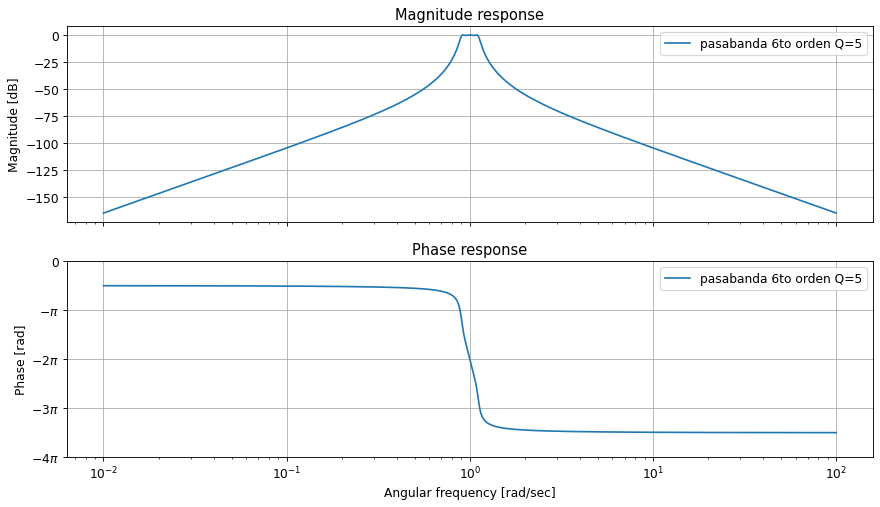

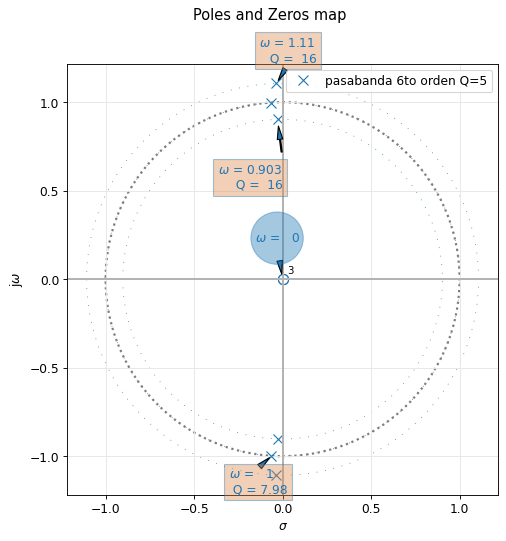

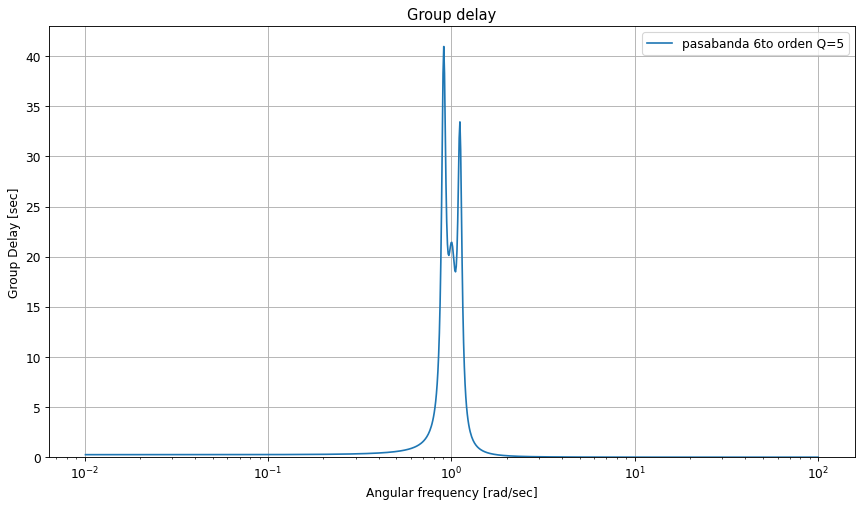

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import sympy as sp
from sympy.abc import s

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS, pretty_print_lti

from pytc2.general import print_subtitle, print_latex, a_equal_b_latex_s

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80

fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_att)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)

        this_sos = tf2sos_analog(num, den)

        pretty_print_lti(num,den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)

    return( all_sys, filter_names, num, den )

aprox_name = 'Chebyshev1'

# parametrizamos el orden para cada aproximación
orders2analyze = [3]

# Requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [0.5] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [24] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximación Chebyshev Pasabajos Prototipo')

( all_sys, filter_names, num, den ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(num, den, bw = 1/Q_bp)

print_subtitle('Pasabanda visto como cociente de polinomios')

print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_lti(num_pbanda, den_pbanda, displaystr=False)))

print_subtitle('Pasabanda factorizado en secciones bicuadráticas (SOS)')

sos_pbanda = tf2sos_analog(num_pbanda, den_pbanda)

print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_SOS(sos_pbanda, displaystr=False)))

print_subtitle('Pasabanda factorizado en SOS parametrizadas $\omega_0$ y $Q$')

print_latex(a_equal_b_latex_s('T_{bp}(s)', pretty_print_SOS(sos_pbanda, mode='omegayq', displaystr=False)))

T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

_ = analyze_sys(T1_bp, sys_name='pasabanda 6to orden Q={:d}'.format(Q_bp))

#### PUNTO #5:

Para realizar la simulación circuital del pasabanda resultante se plantearon tres redes pasabanda "CLR" de orden 2 en cascada, separadas por seguidores de tensión activos, como se ve en la figura. También se detalla a continuación la transferencia total del circuito planteado, y la obtenida en el **PUNTO #3**.

\begin{equation}
T(s) = \frac{s \cdot \frac{R_1}{L_1}}{s^2 + s \cdot \frac{R_1}{L_1} + \frac{1}{L_1C_1}} \cdot \frac{s \cdot \frac{R_2}{L_2}}{s^2 + s \cdot \frac{R_2}{L_2} + \frac{1}{L_2C_2}} \cdot \frac{s \cdot \frac{R_3}{L_3}}{s^2 + s \cdot \frac{R_3}{L_3} + \frac{1}{L_3C_3}}
\end{equation}

\begin{equation}
T(s)_{BP} = \frac{s \cdot \frac{1}{7.975}}{s^2 + s \cdot \frac{1}{7.975} + 1} \cdot \frac{3.434 \cdot s \cdot \frac{0.903}{16.062}}{s^2 + s \cdot \frac{0.903}{16.062} + 0.903^2 } \cdot \frac{3.434 \cdot s \cdot \frac{1.108}{16.062}}{s^2 + s \cdot \frac{1.108}{16.062} + 1.108^2 }
\end{equation}

\begin{equation}
\omega_{BP1} = 1 ; Q_{BP1} = 7.975 ; k_1 = 1
\end{equation}

\begin{equation}
\omega_{BP2} = 0.903 ; Q_{BP2} = 16.062 ; k_2 = 3.434
\end{equation}

\begin{equation}
\omega_{BP3} = 1.108 ; Q_{BP3} = 16.062 ; k_3 = 3.434
\end{equation}

![alt text](circ_pasivo_ej5_ts5.png)

Para realizar la simulación, se estableció la siguiente normalización, tomando como norma de impedancia a la resistencia $R_1$:

\begin{equation}
\Omega_Z = R_1
\end{equation}

\begin{equation}
R_2 = R_3 = R_1
\end{equation}

\begin{equation}
\frac{\omega_{BP1}}{Q_{BP1}} = \frac{R_1}{L_1} \rightarrow L_1 = \frac{R_1 \cdot Q_{BP1}}{\omega_{BP1}}
\end{equation}

\begin{equation}
\omega_{BP1}^2 = \frac{1}{L_1C_1} \rightarrow C_1 = \frac{1}{R_1 \cdot Q_{BP1} \cdot \omega_{BP1}}
\end{equation}

\begin{equation}
\frac{\omega_{BP2}}{Q_{BP2}} = \frac{R_2}{L_2} = \frac{R_1}{L_2} \rightarrow L_2 = \frac{R_1 \cdot Q_{BP2}}{\omega_{BP2}}
\end{equation}

\begin{equation}
\omega_{BP2}^2 = \frac{1}{L_2C_2} \rightarrow C_2 = \frac{1}{R_1 \cdot Q_{BP2} \cdot \omega_{BP2}}
\end{equation}

\begin{equation}
\frac{\omega_{BP3}}{Q_{BP3}} = \frac{R_3}{L_3} = \frac{R_1}{L_3} \rightarrow L_3 = \frac{R_1 \cdot Q_{BP3}}{\omega_{BP3}}
\end{equation}

\begin{equation}
\omega_{BP3}^2 = \frac{1}{L_3C_3} \rightarrow C_3 = \frac{1}{R_1 \cdot Q_{BP3} \cdot \omega_{BP3}}
\end{equation}

A continuación, se procede a realizar la simulación de la red ya vista, en primer lugar, con valores normalizados de $R_1 = 1\Omega$ y $\omega_0 = 1$:

![alt text](red_normal_ej5_ts5.png)

![alt text](sim_normal_ej5_ts5.png)

Ahora simulamos la misma red, pero con valores desnormalizados de $R_1 = 1K\Omega$ y $\omega_0 = 2\pi \cdot 22KHz$:

![alt text](red_no_norm_ej5_ts5.png)

![alt text](sim_no_norm_ej5_ts5.png)

En ambos casos, se puede observar como a la frecuencia $f_0$ o $\omega_0$, la ganancia del filtro se encuentra por debajo de -0.5dB, y no por encima como se esperaba. Esto se debe a que al implementar el filtro con estructuras pasivas en el límite de atenuación máxima de -0.5dB, parte de la ganancia se utiliza en compensar las pérdidas adicionales generadas por los componentes pasivos, entre otras causas.

#### PUNTO #6:

Para poder realizar la transformación pasa altos, volveremos a la siguiente expresión de la transferencia pasabajos prototipo:

\begin{equation}
T(S)_{LP} = \frac{c}{S^3 + a S^2 + b S + c}
\end{equation}

Luego, aplicamos el núcleo de transformación pasa altos:

\begin{equation}
T(s)_{HP} = T(S)_{LP}|_{S = \frac{1}{s}} = \frac{c}{(\frac{1}{s})^3 + a (\frac{1}{s})^2 + b \frac{1}{s} + c} = \frac{s^3}{s^3 + \frac{b}{c} s^2 + \frac{a}{c} s + \frac{1}{c}} = \frac{s^3}{s^3 + 2.144 s^2 + 1.75 s + 1.397}
\end{equation}

\begin{equation}
T(s)_{HP} = \frac{s}{s + 1.596} \cdot \frac{s^2}{(s + 0.274 - j0.895) \cdot (s + 0.274 + j0.895)} = \frac{s}{s + 1.596} \cdot \frac{s^2}{s^2 + 0.548s + 0.876}
\end{equation}

\begin{equation}
T(s)_{HP} = \frac{s}{s + 1.596} \cdot \frac{s^2}{s^2 + s \frac{0.936}{1.708} + 0.936^2}
\end{equation}

#### PUNTO #7:

Para este inciso, se utilizó la siguiente red pasabajos de orden 3, implementada con estructuras pasivas, separadas por un seguidor de tensión activo. También se detallan a continuación su función transferencia, y la encontrada en el **PUNTO #2**.

\begin{equation}
T(s) = \frac{\frac{1}{L_1C_1}}{s^2 + s \frac{1}{C_1R_1} + \frac{1}{L_1C_1}} \cdot \frac{\frac{1}{C_2R_2}}{s + \frac{1}{C_2R_2}}
\end{equation}

\begin{equation}
T(s)_{LP} = \frac{1.069^2}{s^2 + \frac{1.069}{1.708} \cdot s + 1.069^2} \cdot \frac{0.627}{s + 0.627}
\end{equation}

\begin{equation}
\omega_{LP1} = 1.069 ; Q_{LP1} = 1.708 ; \omega_{LP2} = 0.627
\end{equation}

![alt text](circ_pasivo_ej7_ts5.png)

Como paso siguiente, se determinan las impedancias de cada componente pasivo, y luego se aplica la transformación de Bruton, obteniendo las impedancias primadas.

\begin{equation}
Z_{R_1} = R_1 \rightarrow Z_{R_1}' = \frac{Z_{R_1}}{s} = \frac{R_1}{s}
\end{equation}

\begin{equation}
Z_{R_2} = R_2 \rightarrow Z_{R_2}' = \frac{Z_{R_2}}{s} = \frac{R_2}{s}
\end{equation}

\begin{equation}
Z_{L_1} = sL \rightarrow Z_{L_1}' = \frac{Z_{L_1}}{s} = L_1
\end{equation}

\begin{equation}
Z_{C_1} = \frac{1}{sC_1} \rightarrow Z_{C_1}' = \frac{Z_{C_1}}{s} = \frac{1}{s^2 C_1}
\end{equation}

\begin{equation}
Z_{C_2} = \frac{1}{sC_2} \rightarrow Z_{C_2}' = \frac{Z_{C_2}}{s} = \frac{1}{s^2 C_2}
\end{equation}

Luego, para determinar los valores de $L_1$, $C_1$ y $C_2$, y por consiguiente los de $D_1$ y $D_2$, normalizamos las resistencias en $R_1 = R_2 = 1\Omega$.

\begin{equation}
\frac{\omega_{LP1}}{Q_{LP1}} = \frac{1}{C_1R_1} \rightarrow C_1 = D_1 = 1.598
\end{equation}

\begin{equation}
\omega_{LP1}^2 = \frac{1}{L_1C_1} \rightarrow L_1 = 0.548
\end{equation}

\begin{equation}
\omega_{LP2} = \frac{1}{C_2R_2} \rightarrow C_2 = D_2 = 1.595
\end{equation}

Con estos valores podemos construir la siguiente red transformada:

![alt text](red_transf_ej7_ts5.png)